<IPython.core.display.Javascript object>

Image saved to: photo.jpg
File photo.jpg found.


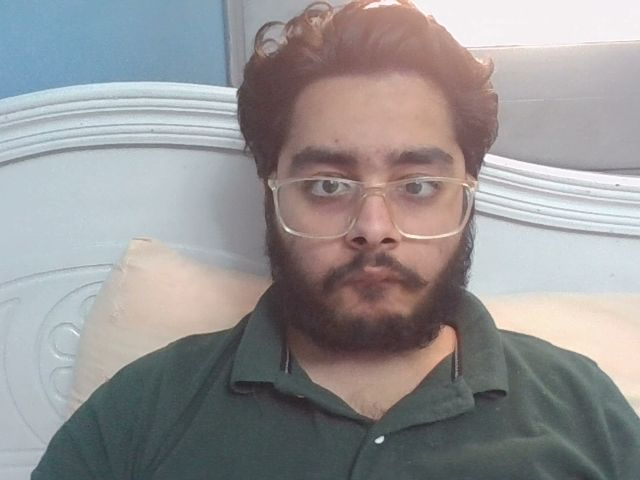

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image
import io
import os # Import os module

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize video to square
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Test capturing
from IPython.display import Image as IPyImage
image_path = take_photo()
print(f"Image saved to: {image_path}") # Added print statement

# Check if the file exists after saving
if os.path.exists(image_path):
    print(f"File {image_path} found.")
else:
    print(f"File {image_path} not found.")


IPyImage(filename=image_path)

In [ ]:
!git clone https://github.com/TachibanaYoshino/AnimeGANv2.git
%cd AnimeGANv2


Cloning into 'AnimeGANv2'...
remote: Enumerating objects: 1735, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 1735 (delta 8), reused 8 (delta 0), pack-reused 1716 (from 1)
Receiving objects: 100% (1735/1735), 1013.15 MiB | 31.75 MiB/s, done.
Resolving deltas: 100% (141/141), done.
Updating files: 100% (322/322), done.
/content/AnimeGANv2


In [ ]:
import torch
from PIL import Image
from torchvision import transforms

# Download model and style transfer function
generator = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="face_paint_512_v2")
face2paint = torch.hub.load("bryandlee/animegan2-pytorch:main", "face2paint", size=512)


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/bryandlee/animegan2-pytorch/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/bryandlee/animegan2-pytorch/raw/main/weights/face_paint_512_v2.pt" to /root/.cache/torch/hub/checkpoints/face_paint_512_v2.pt


100%|██████████| 8.20M/8.20M [00:00<00:00, 103MB/s]
Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main


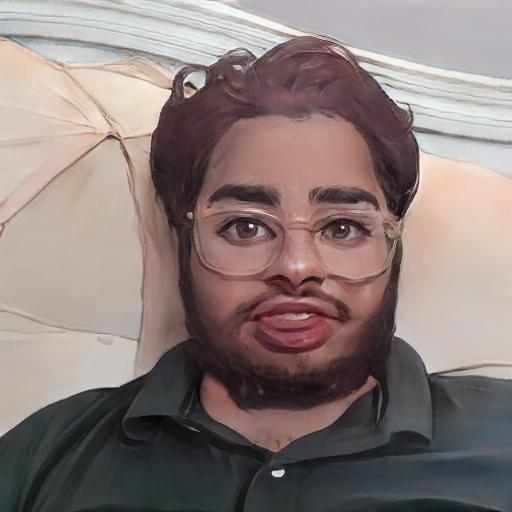

In [ ]:
# Load your webcam photo
input_img = Image.open("/content/photo.jpg").convert("RGB")

# Apply style transfer
output_img = face2paint(generator, input_img)

# Save and show result
output_img.save("anime_result.jpg")

from IPython.display import Image as IPyImage
IPyImage("anime_result.jpg")

In [ ]:
config_text = """
dataset: my_dataset
light: False
init_lr: 1e-4
epoch: 100
batch_size: 4
img_size: 256
lambda_gray: 0
lambda_color: 10
lambda_tv: 1
lambda_adv: 300
lambda_content: 1
g_adv_weight: 1
style: my_style
"""
with open("train_my_dataset.yaml", "w") as f:
    f.write(config_text)


In [ ]:
import yaml

# Load the YAML config
with open("train_my_dataset.yaml", "r") as f:
    config = yaml.safe_load(f)


In [ ]:
# Config values from YAML
dataset_name = config['dataset']
light = config['light']
init_lr = config['init_lr']
epochs = config['epoch']
batch_size = config['batch_size']
img_size = config['img_size']
lambda_gray = config['lambda_gray']
lambda_color = config['lambda_color']
lambda_tv = config['lambda_tv']
lambda_adv = config['lambda_adv']
lambda_content = config['lambda_content']
g_adv_weight = config['g_adv_weight']
style = config['style']


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedayman2004","key":"5734a9f7dfc830446806a0d5dd36c810"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d splcher/animefacedataset
!unzip animefacedataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/62764_2019.jpg   
  inflating: images/62765_2019.jpg   
  inflating: images/62766_2019.jpg   
  inflating: images/62767_2019.jpg   
  inflating: images/62768_2019.jpg   
  inflating: images/62769_2019.jpg   
  inflating: images/6276_2003.jpg    
  inflating: images/62770_2019.jpg   
  inflating: images/62771_2019.jpg   
  inflating: images/62772_2019.jpg   
  inflating: images/62773_2019.jpg   
  inflating: images/62774_2019.jpg   
  inflating: images/62775_2019.jpg   
  inflating: images/62776_2019.jpg   
  inflating: images/62777_2019.jpg   
  inflating: images/62778_2019.jpg   
  inflating: images/62779_2019.jpg   
  inflating: images/6277_2003.jpg    
  inflating: images/62780_2019.jpg   
  inflating: images/62781_2019.jpg   
  inflating: images/62782_2019.jpg   
  inflating: images/62783_2019.jpg   
  inflating: images/62784_2019.jpg   
  inflating: images/62785_2019.jpg   
  inflating: images/62786_2019.jpg   

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip celeba-dataset.zip -d celeba_dataset


Streaming output truncated to the last 5000 lines.
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081241.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081242.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081243.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081244.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081245.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081246.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081247.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081248.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081249.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081250.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081251.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/081252.jpg  
  inflating: celeba_dataset/img_align_celeba/img_

In [ ]:
import os
from glob import glob

anime_paths = glob('/content/images/*.jpg')
human_paths = glob('/content/celeba_dataset/img_align_celeba/img_align_celeba/*.jpg')

print("Anime images:", len(anime_paths))
print("Human images:", len(human_paths))


In [ ]:
import torch
from torchvision import transforms, datasets # Import datasets
from torch.utils.data import DataLoader # Import DataLoader
import os # Import os module

# Use batch_size, img_size, etc.
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor()
])

# Assuming you already organized dataset under data/trainA and data/trainB
trainA_path = "/content/AnimeGANv2/animegan2-pytorch/data/trainA"
trainB_path = "/content/AnimeGANv2/animegan2-pytorch/data/trainB"

# Check if directories exist and contain files
if not os.path.exists(trainA_path):
    print(f"Error: Directory not found: {trainA_path}")
elif not os.listdir(trainA_path):
    print(f"Error: Directory is empty: {trainA_path}")
else:
    dataset_real = datasets.ImageFolder(trainA_path, transform=transform)
    loader_real = DataLoader(dataset_real, batch_size=batch_size, shuffle=True)
    print(f"Successfully loaded dataset from: {trainA_path}")


if not os.path.exists(trainB_path):
    print(f"Error: Directory not found: {trainB_path}")
elif not os.listdir(trainB_path):
    print(f"Error: Directory is empty: {trainB_path}")
else:
    dataset_anime = datasets.ImageFolder(trainB_path, transform=transform)
    loader_anime = DataLoader(dataset_anime, batch_size=batch_size, shuffle=True)
    print(f"Successfully loaded dataset from: {trainB_path}")

Error: Directory not found: /content/AnimeGANv2/animegan2-pytorch/data/trainA
Error: Directory not found: /content/AnimeGANv2/animegan2-pytorch/data/trainB


In [ ]:
!pip install opencv-python


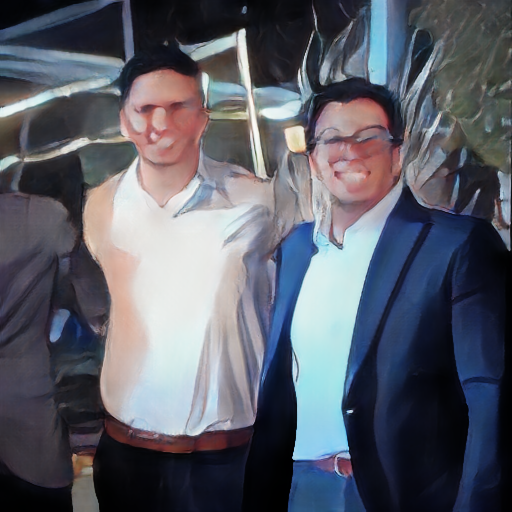

⏳ Capturing frame 7...


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
import cv2
from IPython.display import display, clear_output
import time
from PIL import Image
import numpy as np

# Load model again (if session restarted)
generator = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="face_paint_512_v2")
face2paint = torch.hub.load("bryandlee/animegan2-pytorch:main", "face2paint", size=512)

# Setup webcam (for local use, replace with cv2.VideoCapture(0))
from google.colab.output import eval_js
from IPython.display import Javascript
from base64 import b64decode
import io

def take_webcam_frame():
    display(Javascript('''
        async function captureWebcamFrame() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '🎥 Capture Frame';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg', 0.8);
        }
        '''))

    data = eval_js('captureWebcamFrame()')
    binary = b64decode(data.split(',')[1])
    return Image.open(io.BytesIO(binary)).convert("RGB")

# Simulate live processing loop
for i in range(10):  # You can increase this to 10+ for testing more frames
    print(f"⏳ Capturing frame {i+1}...")
    frame = take_webcam_frame()

    print("🎨 Applying anime style...")
    anime_frame = face2paint(generator, frame)

    anime_frame.save(f"anime_frame_{i+1}.jpg")
    clear_output(wait=True)
    display(anime_frame)

    time.sleep(1)


In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload your kaggle.json file here
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d splcher/animefacedataset
!unzip -q animefacedataset.zip -d anime_faces


Dataset URL: https://www.kaggle.com/datasets/splcher/animefacedataset
License(s): DbCL-1.0
 86% 341M/395M [00:02<00:00, 85.7MB/s]
100% 395M/395M [00:02<00:00, 145MB/s] 


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q celeba-dataset.zip -d celeba_faces


Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
100% 1.33G/1.33G [00:12<00:00, 293MB/s]
100% 1.33G/1.33G [00:12<00:00, 111MB/s]


In [ ]:
%cd /content/AnimeGANv2


/content/AnimeGANv2


In [ ]:
!mkdir -p AnimeGANv2/dataset/my_dataset/trainA
!mkdir -p AnimeGANv2/dataset/my_dataset/trainB



In [ ]:
!find /content/AnimeGANv2/celeba_faces/img_align_celeba/img_align_celeba -name "*.jpg" | head -n 5000 | xargs -I {} cp {} /content/AnimeGANv2/dataset/my_dataset/trainA/


In [ ]:
!ls /content/AnimeGANv2/dataset/my_dataset/trainA

000001.jpg  001640.jpg	003226.jpg  004916.jpg	006550.jpg  008255.jpg
000005.jpg  001642.jpg	003228.jpg  004918.jpg	006551.jpg  008256.jpg
000010.jpg  001643.jpg	003231.jpg  004920.jpg	006554.jpg  008257.jpg
000011.jpg  001645.jpg	003232.jpg  004923.jpg	006556.jpg  008258.jpg
000012.jpg  001646.jpg	003233.jpg  004924.jpg	006557.jpg  008260.jpg
000015.jpg  001647.jpg	003234.jpg  004926.jpg	006558.jpg  008261.jpg
000017.jpg  001650.jpg	003235.jpg  004929.jpg	006560.jpg  008263.jpg
000020.jpg  001651.jpg	003236.jpg  004933.jpg	006561.jpg  008264.jpg
000023.jpg  001652.jpg	003237.jpg  004935.jpg	006563.jpg  008265.jpg
000025.jpg  001653.jpg	003238.jpg  004936.jpg	006564.jpg  008266.jpg
000026.jpg  001654.jpg	003239.jpg  004937.jpg	006567.jpg  008267.jpg
000032.jpg  001657.jpg	003242.jpg  004938.jpg	006568.jpg  008269.jpg
000034.jpg  001658.jpg	003243.jpg  004939.jpg	006569.jpg  008271.jpg
000036.jpg  001660.jpg	003247.jpg  004940.jpg	006570.jpg  008272.jpg
000042.jpg  001664.jpg	003248.jpg 

In [ ]:
!find /content/AnimeGANv2/anime_faces/images -name "*.jpg" | head -n 5000 | xargs -I {} cp {} /content/AnimeGANv2/dataset/my_dataset/trainB

In [ ]:
!ls /content/AnimeGANv2/dataset/my_dataset/trainB

0_2000.jpg	10900_2005.jpg	1180_2001.jpg	1270_2001.jpg	13602_2006.jpg
10000_2004.jpg	10901_2005.jpg	11802_2005.jpg	12702_2005.jpg	13603_2006.jpg
10001_2004.jpg	1090_2001.jpg	11803_2005.jpg	12703_2005.jpg	13604_2006.jpg
1000_2000.jpg	10902_2005.jpg	11804_2005.jpg	12704_2005.jpg	13605_2006.jpg
10002_2004.jpg	10903_2005.jpg	11805_2005.jpg	12705_2005.jpg	13606_2006.jpg
10003_2004.jpg	10904_2005.jpg	11806_2005.jpg	12706_2005.jpg	13607_2006.jpg
10004_2004.jpg	10905_2005.jpg	11807_2005.jpg	12707_2005.jpg	13608_2006.jpg
10005_2004.jpg	10906_2005.jpg	11808_2005.jpg	12708_2005.jpg	13609_2006.jpg
10006_2004.jpg	10907_2005.jpg	11809_2005.jpg	12709_2005.jpg	13610_2006.jpg
10007_2004.jpg	10908_2005.jpg	11810_2005.jpg	12710_2005.jpg	13611_2006.jpg
10008_2004.jpg	10909_2005.jpg	11811_2005.jpg	12711_2005.jpg	1361_2001.jpg
10009_2004.jpg	10910_2005.jpg	1181_2001.jpg	1271_2001.jpg	13612_2006.jpg
10010_2004.jpg	10911_2005.jpg	11812_2005.jpg	12712_2005.jpg	13613_2006.jpg
10011_2004.jpg	1091_2001.jpg	11813_2

In [ ]:
config_text = """
dataset: my_dataset
light: False
init_lr: 1e-4
epoch: 20
batch_size: 4
img_size: 256
lambda_gray: 0
lambda_color: 10
lambda_tv: 1
lambda_adv: 300
lambda_content: 1
g_adv_weight: 1
style: my_style
"""
with open("/content/AnimeGANv2/train_my_dataset.yaml", "w") as f:
    f.write(config_text)


In [ ]:
%cd /content/AnimeGANv2


/content/AnimeGANv2


In [ ]:
!python train.py --yaml /content/AnimeGANv2/train_my_dataset.yaml


2025-08-05 10:48:12.515117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754390892.921705   24081 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754390893.037973   24081 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-05 10:48:13.911767: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Traceback (most recent call last):
  File "/content/AnimeGANv2/train.py", line 1, in <module>
    from AnimeGANv2 import Anim

In [ ]:
# Clone the repository
!git clone https://github.com/bryandlee/animegan2-pytorch.git
%cd animegan2-pytorch



Cloning into 'animegan2-pytorch'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 242 (delta 97), reused 43 (delta 43), pack-reused 125 (from 1)
Receiving objects: 100% (242/242), 38.39 MiB | 28.38 MiB/s, done.
Resolving deltas: 100% (118/118), done.
/content/AnimeGANv2/animegan2-pytorch/animegan2-pytorch


In [ ]:
# Copy your Kaggle datasets over
!mkdir -p data/trainA data/trainB
!cp -r /content/AnimeGANv2/dataset/my_dataset/trainA/* data/trainA/
!cp -r /content/AnimeGANv2/dataset/my_dataset/trainB/* data/trainB/

In [ ]:
import os
import shutil

os.makedirs("data/trainA", exist_ok=True)
os.makedirs("data/trainB", exist_ok=True)

# Move or copy data (adjust paths if needed)
shutil.copytree("/content/AnimeGANv2/celeba_faces/img_align_celeba", "data/trainA", dirs_exist_ok=True)
shutil.copytree("/content/AnimeGANv2/anime_faces/images", "data/trainB", dirs_exist_ok=True)


In [ ]:
!pip install -r requirements.txt


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

IMG_SIZE = 256
BATCH_SIZE = 1

def load_and_preprocess(path):
    img = Image.open(path).convert('RGB').resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img).astype(np.float32)
    img = (img / 127.5) - 1.0  # Normalize to [-1, 1]
    return img

# Generator function
def image_gen(image_paths):
    for path in image_paths:
        try:
            yield load_and_preprocess(path)
        except:
            continue  # Skip corrupted files

# Create TensorFlow datasets
anime_dataset = tf.data.Dataset.from_generator(
    lambda: image_gen(anime_paths),
    output_signature=tf.TensorSpec(shape=(IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32)
)

human_dataset = tf.data.Dataset.from_generator(
    lambda: image_gen(human_paths),
    output_signature=tf.TensorSpec(shape=(IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32)
)

# Shuffle, repeat, and batch
anime_dataset = anime_dataset.shuffle(1000).repeat().batch(BATCH_SIZE)
human_dataset = human_dataset.shuffle(1000).repeat().batch(BATCH_SIZE)


In [ ]:

# Generators
generator_g = pix2pix.unet_generator(3, norm_type='instancenorm')  # human → anime
generator_f = pix2pix.unet_generator(3, norm_type='instancenorm')  # anime → human
def downsample(filters, size, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                      kernel_initializer=initializer, use_bias=False))

    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization())

    result.add(tf.keras.layers.LeakyReLU())
    return result

def build_discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
    x = downsample(64, 4, False)(inp)
    x = downsample(128, 4)(x)
    x = downsample(256, 4)(x)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(x)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                  kernel_initializer=initializer,
                                  use_bias=False)(zero_pad1)

    norm1 = tfa.layers.InstanceNormalization()(conv)
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)
    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                  kernel_initializer=initializer)(zero_pad2)

    return tf.keras.Model(inputs=inp, outputs=last)

# Discriminators
discriminator_x = build_discriminator()  # human
discriminator_y = build_discriminator()  # anime


In [ ]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)
LAMBDA = 10

def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    return (real_loss + generated_loss) * 0.5

def calc_cycle_loss(real, cycled):
    return LAMBDA * tf.reduce_mean(tf.abs(real - cycled))

def identity_loss(real, same):
    return LAMBDA * 0.5 * tf.reduce_mean(tf.abs(real - same))

# Optimizers
gen_g_opt = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
gen_f_opt = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
disc_x_opt = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
disc_y_opt = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [ ]:
@tf.function
def train_step(real_x, real_y):
    with tf.GradientTape(persistent=True) as tape:
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)

        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)

        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)

        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)

        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

        # Losses
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)
        cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
        id_loss = identity_loss(real_x, same_x) + identity_loss(real_y, same_y)

        total_g_loss = gen_g_loss + cycle_loss + id_loss
        total_f_loss = gen_f_loss + cycle_loss + id_loss

        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

    # Apply gradients
    gen_g_opt.apply_gradients(zip(tape.gradient(total_g_loss, generator_g.trainable_variables), generator_g.trainable_variables))
    gen_f_opt.apply_gradients(zip(tape.gradient(total_f_loss, generator_f.trainable_variables), generator_f.trainable_variables))
    disc_x_opt.apply_gradients(zip(tape.gradient(disc_x_loss, discriminator_x.trainable_variables), discriminator_x.trainable_variables))
    disc_y_opt.apply_gradients(zip(tape.gradient(disc_y_loss, discriminator_y.trainable_variables), discriminator_y.trainable_variables))


In [ ]:
import time

EPOCHS = 3

train_human_iter = iter(human_dataset)
train_anime_iter = iter(anime_dataset)

for epoch in range(EPOCHS):
    start = time.time()
    print(f"Epoch {epoch+1}/{EPOCHS}")

    for _ in range(1000):  # 1000 steps per epoch (tune later)
        real_human = next(train_human_iter)
        real_anime = next(train_anime_iter)
        train_step(real_human, real_anime)

    print(f"✅ Epoch {epoch+1} completed in {time.time()-start:.2f} seconds\n")
